# Imports

In [10]:
import pandas as pd
import numpy as np

import tensorflow as tf
from sklearn.model_selection import train_test_split

from PIL import Image

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

# Data Handling

In [11]:
data = pd.read_csv('D:/ML_Data/age_gender_ethnicity/age_gender.csv')
data['pixels'] = data['pixels'].apply(lambda x: np.array(x.split(), dtype="float32")) # Convert the spaced integers into a list of floats

In [12]:
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [13]:
data['pixels'] = data['pixels'].apply(lambda x: x/255)

In [23]:
age_dist = data['age'].value_counts()
ethnicity_dist = data['ethnicity'].value_counts()
gender_dist = data['gender'].value_counts().rename(index={0:'Male',1:'Female'})

def ditribution_plot(x,y,name):
    fig = go.Figure([go.Bar(x=x, y=y)])

    fig.update_layout(title_text=name)
    fig.show()

In [24]:
ditribution_plot(x=age_dist.index, y=age_dist.values, name='Age Distribution')

In [25]:
ditribution_plot(x=ethnicity_dist.index, y=ethnicity_dist.values, name='Ethnicity Distribution')

In [26]:
ditribution_plot(x=gender_dist.index, y=gender_dist.values, name='Gender Distribution')

In [27]:
X = np.array(data['pixels'].tolist())
X = X.reshape(X.shape[0],48,48,1)

In [35]:
def show_sample_img(index):
    plt.imshow(data['pixels'].iloc[index].reshape(48,48))
    plt.xlabel(
            "Age:"+str(data['age'].iloc[index])+
            "  Ethnicity:"+str(data['ethnicity'].iloc[index])+
            "  Gender:"+ str(data['gender'].iloc[index])
        )

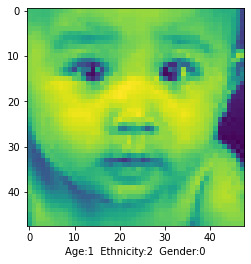

In [37]:
show_sample_img(0)

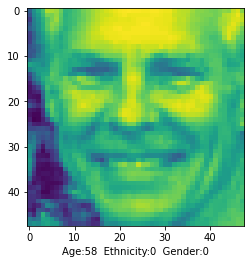

In [43]:
show_sample_img(20000)

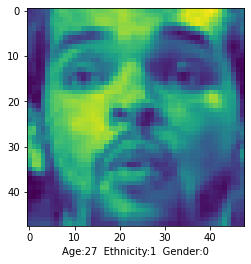

In [39]:
show_sample_img(9000)

# Gender Prediction (1)

In [44]:
y1 = data['gender']

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y1, test_size=0.22, random_state=37
)

In [45]:
model1 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(48,48,1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
]) # CNN number 1

In [48]:
model1.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Stop training when validation loss reaches 0.2700
class callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.2700):
            print("\nReached 0.2700 val_loss so training voided")
            self.model.stop_training = True

callback = callback()

In [49]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                4

In [50]:
history = model1.fit(
    X_train1, y_train1, epochs=20, validation_split=0.1, batch_size=64, callbacks=[callback]
)

Epoch 1/20
260/260 [==============================] - 32s 122ms/step - loss: 0.5103 - accuracy: 0.7451 - val_loss: 0.5941 - val_accuracy: 0.8167
Epoch 2/20
260/260 [==============================] - 30s 114ms/step - loss: 0.3908 - accuracy: 0.8263 - val_loss: 0.4122 - val_accuracy: 0.8350
Epoch 3/20
260/260 [==============================] - 29s 113ms/step - loss: 0.3532 - accuracy: 0.8412 - val_loss: 0.3399 - val_accuracy: 0.8556
Epoch 4/20
260/260 [==============================] - 29s 112ms/step - loss: 0.3294 - accuracy: 0.8532 - val_loss: 0.3409 - val_accuracy: 0.8448
Epoch 5/20
260/260 [==============================] - 29s 112ms/step - loss: 0.3145 - accuracy: 0.8604 - val_loss: 0.3109 - val_accuracy: 0.8643
Epoch 6/20
260/260 [==============================] - 29s 112ms/step - loss: 0.2996 - accuracy: 0.8685 - val_loss: 0.3092 - val_accuracy: 0.8594
Epoch 7/20
260/260 [==============================] - 29s 113ms/step - loss: 0.2860 - accuracy: 0.8754 - val_loss: 0.3078 - val_ac

In [52]:
model1.save('gender_model.h5')